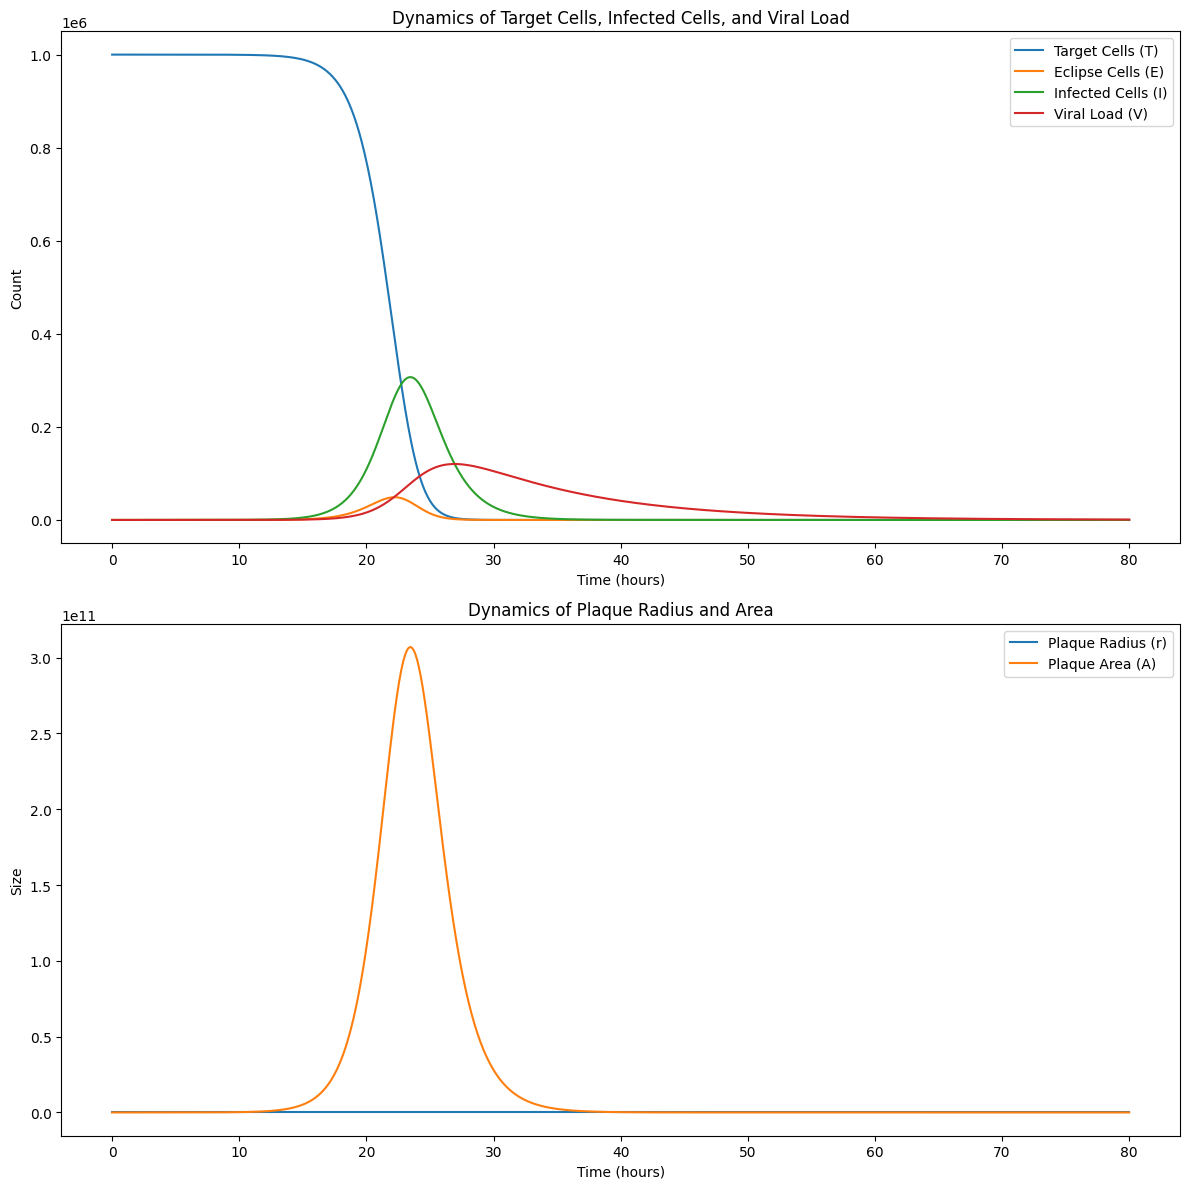

In [15]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the model (system of ODEs)
def target_cell_limited_model(y, t, params):
    T, E, I, V = y
    beta, k, c, delta, kE = params
    
    dTdt = - beta * T * V
    dEdt = beta * T * V - kE * E
    dIdt = kE * E - delta * I
    dVdt = k * I - c * V
    
    return [dTdt, dEdt, dIdt, dVdt]

# Initial conditions
T0 = 1e6  # Initial target cells
E0 = 1   # Initial eclipse cells
I0 = 0    # Initial infected cells
V0 = 0 # Initial viral load

# Parameters
beta = 1e-5    # Infection rate
k = 0.1        # Viral production rate
c = 0.1          # Viral clearance rate
delta = 0.5    # Infected cell clearance rate
alpha = 1e-6   # Proportionality constant between infected cells and plaque area
kE = 4         # Eclipse transition

params = (beta, k, c, delta, kE)

# Time grid for integration
t = np.linspace(0, 80, 1000)

# Integrate the ODEs
result = odeint(target_cell_limited_model, [T0, E0, I0, V0], t, args=(params,))

T = result[:, 0]
E = result[:, 1]
I = result[:, 2]
V = result[:, 3]

# Calculate radius and area based on the number of infected cells
r = np.sqrt(I / (alpha * np.pi))
A = I / alpha

# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot target cells, infected cells, and viral load
axs[0].plot(t, T, label='Target Cells (T)')
axs[0].plot(t, E, label='Eclipse Cells (E)')
axs[0].plot(t, I, label='Infected Cells (I)')
axs[0].plot(t, V, label='Viral Load (V)')
#axs[0].set_yscale('log')
#axs[0].set_ylim(1, 1E8)
axs[0].set_xlabel('Time (hours)')
axs[0].set_ylabel('Count')
axs[0].set_title('Dynamics of Target Cells, Infected Cells, and Viral Load')
axs[0].legend()

# Plot radius and area of the viral plaque
axs[1].plot(t, r, label='Plaque Radius (r)')
axs[1].plot(t, A, label='Plaque Area (A)')
#axs[1].set_yscale('log')
#axs[1].set_ylim(1, 1E12)
axs[1].set_xlabel('Time (hours)')
axs[1].set_ylabel('Size')
axs[1].set_title('Dynamics of Plaque Radius and Area')
axs[1].legend()

plt.tight_layout()
plt.show()


In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [4]:
# Generating random parameters from a uniform distribution in log space between -10 and 10
num_params = 20  # Total number of parameters (6 fixed + 14 unknown)
params = np.exp(np.random.uniform(-10, 10, num_params))

# Define parameter labels
param_labels = [
    'n', 'k73', 'tau2', 'tau3', 'tau4', 'tau5', 
    'k11', 'k12', 'k13', 'k14', 'k21', 'k31', 'k32', 'k33', 'k41', 'k42', 'k51', 'k61', 'k71', 'k72'
]

# Create a dictionary to store the parameters with their labels
param_dict = dict(zip(param_labels, params))

param_dict

{'n': 0.7065055917333626,
 'k73': 0.020577754267595734,
 'tau2': 7.747871083146679e-05,
 'tau3': 0.00010276718122078323,
 'tau4': 15.178753570590876,
 'tau5': 6.568171576356482e-05,
 'k11': 0.28641975401414005,
 'k12': 6446.460375075039,
 'k13': 218.10464862909689,
 'k14': 0.009045275399019037,
 'k21': 0.4276768635726391,
 'k31': 0.0012622259949735758,
 'k32': 2814.17098984982,
 'k33': 0.3455195834189456,
 'k41': 18376.37077079185,
 'k42': 4.611602786100308,
 'k51': 0.0061184808945742904,
 'k61': 0.30286422016685166,
 'k71': 823.8756179877639,
 'k72': 0.02326427203517321}

In [5]:
def model(y, t, params):
    IFN, IFNe, STATP, IRF7, IRF7P, P, V = y
    locals().update(params)
    # ODEs
    dIFN_dt = P * (k11 * 1 * V + (k12 * V ** n) / (k13 + V ** n) + k14 * IRF7P) - k21 * IFN
    dIFNe_dt = k21 * IFN - IFNe * tau2
    dSTATP_dt = k31 * P * IFNe * k32 + k33 * IFNe - STATP * tau3
    dIRF7_dt = P * (k41 * STATP + k42 * IRF7P) - IRF7 * tau4
    dIRF7P_dt = k51 * P * IRF7 - IRF7P * tau5
    dP_dt = -k61 * P * V
    dV_dt = k71 * P * V / (1 + k72 * IFNe) - k73 * V

    return [dIFN_dt, dIFNe_dt, dSTATP_dt, dIRF7_dt, dIRF7P_dt, dP_dt, dV_dt]


In [6]:
# Importing additional necessary libraries
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Initial Conditions
# Using float64 for the ODE solver for better precision, setting initial virus to a very small positive amount
initial_conditions = [0, 0, 0, 0, 0, 1, np.finfo(np.float64).tiny]

# Time grid for integration
t = np.linspace(0, 100, 1000)  # Adjust as needed

# Solving the ODEs
solution = odeint(model, initial_conditions, t, args=(param_dict,))

# Extract and plot the results
IFN, IFNe, STATP, IRF7, IRF7P, P, V = solution.T

plt.figure(figsize=(12, 8))
plt.plot(t, IFN, label="[IFN]")
plt.plot(t, IFNe, label="[IFNe]")
plt.plot(t, STATP, label="[STATP]")
plt.plot(t, IRF7, label="[IRF7]")
plt.plot(t, IRF7P, label="[IRF7P]")
plt.plot(t, P, label="[P]")
plt.plot(t, V, label="[V]")
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Simulation of the Innate Immune Response to Respiratory RNA Viral Infection')
plt.show()

NameError: name 'k11' is not defined

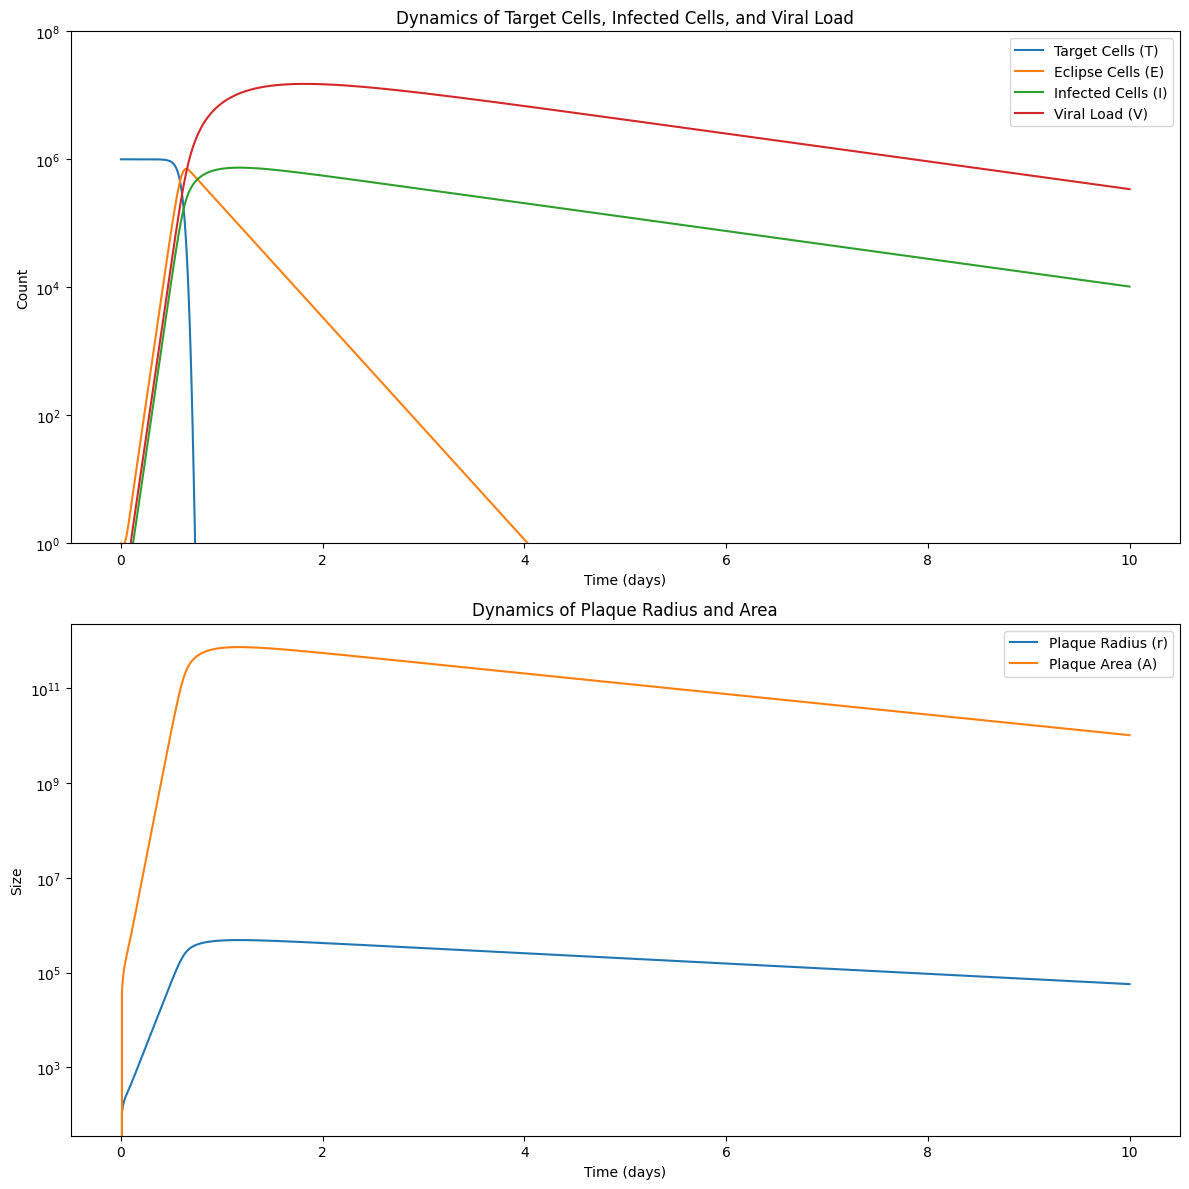